# MT2503 Multivariate Calculus: Computing Project (Semester 1 of 2021/22)

#### Before starting the project
There are two helper worksheets associated with this project. These look at those parts of Python's *SymPy* and *Matplotlib* libraries that are required for this project. You should work through these first before attempting the project.  The exercises within those worksheets are not assessed (and solutions are available); they are designed to help you familiarise yourself with the relevant commands.

#### Submitting your project
You should upload your work to the relevant MySaint area as a single file by **5pm on Friday 19 November 2021**. In order to do this, you will need to download the file from this server using `Download as>Notebook` in the `File` menu. The file **must** be downloaded as a Notebook. Your project must be self-contained such that it works when run in sequence (from top to bottom) by the marker. Please **validate** the project before submitting it (see below). When you are ready to submit your project, the process is therefore (in order): validate your project, download the project as a Notebook, and upload this Notebook to MySaint.

The project is worth 15% of your final grade in the module.  There are 30 marks available for the project.

#### Getting help
Help is available from staff in your computing lab session for each of Weeks 7-10 of the semester.  Make sure to use these well - and do not leave all your questions to Week 10 (there are only so many things we can answer in the hour!)


#### Validation
You will see a number of code cells in the notebook with the comment `# VALIDATION CELL` at the top. You do not need to, and should not, make changes to these cells. Running one of these cells will perform some simple checks on the format of your work (for example, checking whether you have defined the variables a question specifies). If a problem is detected an error will be produced giving you some feedback; if there is no detected problem there will be no output. These cells **do not** test if your answer is actually correct. You can run all of the validation cells by clicking the "Validate" button on the menu bar, but be aware that the validation for questions you have not attempted yet will automatically fail. Please ensure using the "Validate" button that your code passes all of the tests before submitting your project.

#### Other comments
For each question three empty cells have been added below. Please don't read anything into this number. You can add or delete cells as you wish. 

Some questions have been broken down into lettered parts for clarity, but you can answer each question in the cells below the question statement (you don't need to say which corresponds to which part(s)).

## Part 1:  Using Python for understanding a function of two variables.

The aim of Part 1 of this project is to show how Python (paticularly via tools in *SymPy* and *Matplotlib*) may be used to help understand functions of two variables. We will define a function, illustrate it using surface and contour plots, and locate every stationary point of the function, identifying the nature of each such point.

The function we will be working with is $$ f(x,y)= (xy-x^3-y^3) \cdot e^{-x^2-y^2}. $$

#### Question 1

(a) Load the relevant packages, and define `x` and `y` as *SymPy* real symbols. Use these to define the function `f`. 

(b) Use `matplotlib` to make both a surface plot and a contour plot of $f(x,y)$, choosing an appropriate range for both independent variables so that the main features of the function are shown on your plots.    
<p style='text-align:right;'> <b> [4 Marks] </b> </p>

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

x,y = sym.symbols(("x","y"),real=True)

f = (x*y-x**3-y**3)*sym.exp(-x**2-y**2)

%matplotlib inline

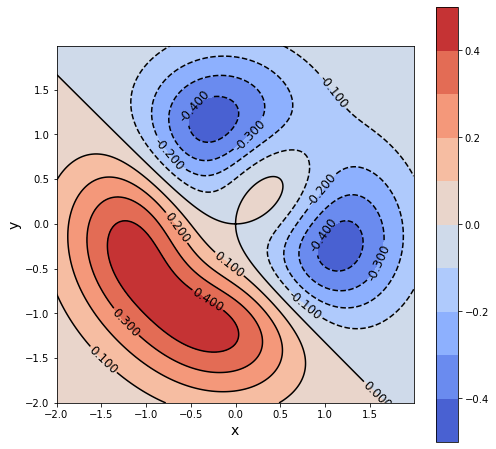

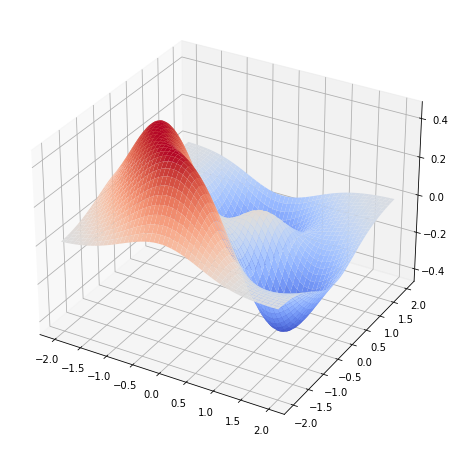

In [2]:
F = sym.lambdify((x,y),f,"numpy")

xp = np.arange(-2,2,0.01)
yp = np.arange(-2,2,0.01)
X,Y = np.meshgrid(xp,yp)


fig = plt.figure(1,figsize=(8,8))
s = fig.add_subplot(111)
A =plt.contour(X,Y,F(X,Y),levels =10,colors="k")
C = s.contourf(X,Y,F(X,Y),levels=10,cmap = plt.cm.coolwarm)
s.clabel(A,fontsize=12)
s.set_aspect(1)
s.set_xlabel('x',fontsize=14)
s.set_ylabel('y',fontsize=14)
fig.colorbar(C);


fig = plt.figure(2,figsize=(8,8))
s = fig.add_subplot(111, projection='3d')
s.plot_surface(X,Y,F(X,Y),cmap='coolwarm')

In [3]:
# VALIDATION CELL
# Cells like this contain some validation.
# If an error is produced, you need to fix something in your code.
# If no error is produced, this is *NOT* a guarantee you have correctly answered the question.
# Do not modify these cells.
import sympy as sym
from nose.tools import assert_is_instance
for var in ['f', 'x', 'y']:
    if not var in globals():
        raise NotImplementedError(var + " has not been defined in Question 1.1")
for var in [x, y]:
    assert_is_instance(var, sym.core.symbol.Symbol)
    assert var.is_real, str(var) + " has not been defined as a 'real' symbol"  

#### Question 2

(a) Use *Sympy* to find the two first partial derivatives of $f$, $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$, and store these in variables called `fx` and `fy`.

Stationary points are locations where the following system of equations is satisfied:

$$\frac{\partial f}{\partial x}=0, \ \  \frac{\partial f}{\partial y}=0.$$ 
  

(b) Determine two polynomial equations which have the same set of solutions as that system. Store these as *SymPy* expressions called `f1x` and `f1y`. 

(c) Use the `nonlinsolve` command to try and solve the system of equations ${f1x=0, f1y=0}$, storing any solutions obtained in a list called `SOLS1`.<p style='text-align:right;'> <b> [4 Marks] </b> </p>

In [5]:
fx = sym.diff(f,x)
fy = sym.diff(f,y)

#removing exponential term as it will never equal 0
f1x = sym.factor(fx)/(sym.exp(-x**2)*sym.exp(-y**2))
f1y = sym.factor(fy)/(sym.exp(-x**2)*sym.exp(-y**2))


eq =[f1x,f1y]
SOLS1 = list(sym.nonlinsolve(eq,[x,y]))

In [6]:
# VALIDATION CELL
from nose.tools import assert_is_instance
for var in ['fx', 'fy']:
    if not var in globals():
        raise NotImplementedError(var + " has not been defined in Question 1.2")
for var in [fx, fy]:
    assert_is_instance(var, sym.core.Expr)


In [7]:
# VALIDATION CELL
from nose.tools import assert_is_instance
for var in ['f1x', 'f1y']:
    if not var in globals():
        raise NotImplementedError(var + " has not been defined in Question 2")
for var in [f1x, f1y]:
    assert_is_instance(var, sym.core.Expr)


In [8]:
# VALIDATION CELL
from nose.tools import assert_is_instance, assert_equal
if not 'SOLS1' in globals():
    raise NotImplementedError("SOLS1 has not been defined in Question 1.2")
assert_is_instance(SOLS1, list, 
                   "SOLS1 should be a list, not a " + str(type(SOLS1)))

assert len(SOLS1) > 0, "SOLS1 is empty"
for sol in SOLS1:
    assert_is_instance(sol, (tuple, list, sym.core.containers.Tuple), 
                       "each individual solution should be a tuple or a list")
    assert_equal(len(sol), 2,
                 "each individual solution should have length 2")


#### Question 3

(a) Use *SymPy* to find the discriminant of $f(x,y)$ and store this as `Delta`. 

(b) Use the discriminant and other appropriate algebraic derivative tests to classify any stationary point(s) you found in Question 2, as either maximum, minimum, or saddle points. 

To store your results create a list called `SOLS1_TYPES` where each entry has format `[x,y,'type']` (e.g. `[5,-7,'saddle']`).    <p style='text-align:right;'> <b> [4 Marks] </b> </p>


In [10]:
Delta = sym.diff(f,x,x)*sym.diff(f,y,y)-(sym.diff(f,x,y))**2

SOLS1_TYPES =[]
for i in range(len(SOLS1)):
    delta_eval = Delta.subs([(x,SOLS1[i][0]),(y,SOLS1[i][1])])
    
    if delta_eval<0:
        SOLS1_TYPES.append([SOLS1[i][0],SOLS1[i][1],"saddle"])
        
    elif delta_eval>0:
        
        if sym.diff(f,x,x).subs([(x,SOLS1[i][0]),(y,SOLS1[i][1])])<0:
            SOLS1_TYPES.append([SOLS1[i][0],SOLS1[i][1],"maximum"])
            
        elif sym.diff(f,x,x).subs([(x,SOLS1[i][0]),(y,SOLS1[i][1])])<0:
            SOLS1_TYPES.append([SOLS1[i][0],SOLS1[i][1],"minimum"])

In [11]:
# VALIDATION CELL
from nose.tools import assert_is_instance
if not 'Delta' in globals():
    raise NotImplementedError("Delta has not been defined in Question 1.3")
assert_is_instance(Delta, sym.core.Expr)


In [12]:
# VALIDATION CELL
from nose.tools import assert_in, assert_is_instance, assert_equal
if not 'SOLS1_TYPES' in globals():
    raise NotImplementedError("SOLS1_TYPES has not been defined in Question 1.3")
assert_is_instance(SOLS1_TYPES, list, 
                   "SOLS1_TYPES should be a list, not a " + str(type(SOLS1_TYPES)))

assert len(SOLS1_TYPES) > 0, "SOLS1_TYPES is empty"
for sol in SOLS1_TYPES:
    assert_is_instance(sol, (tuple, list), 
                       "each entry of SOLS1_TYPES should be a tuple or a list")
    assert_equal(len(sol), 3,
                 "each entry of SOLS1_TYPES should have length 3")
    
    assert_in(sol[2].lower(), ["maximum", "minimum", "saddle"],
             str(sol[2]) + " should be one of 'maximum', 'minimum', or 'saddle'")


#### Question 4 

(a) For any stationary points found in Question 2 that lie within the circle centered at the origin with radius $\frac{1}{2}$ (i.e. within $x^2+y^2=\frac{1}{4}$), make a contour plot that illustrates the local behaviour of $f(x,y)$ around the stationary point.  

(b) For any contour plot produced, explain in words how the plot confirms the nature of the stationary point that was shown algebraically in Question 3.      <p style='text-align:right;'> <b> [4 Marks] </b> </p>

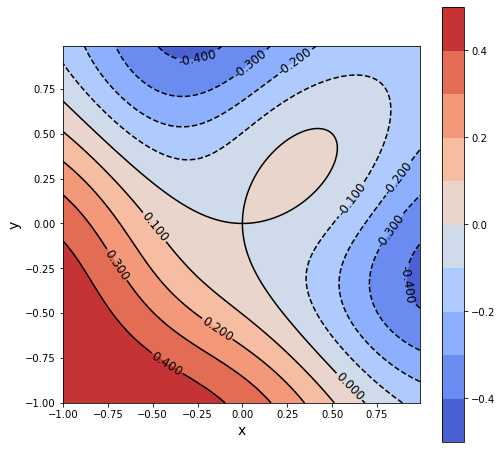

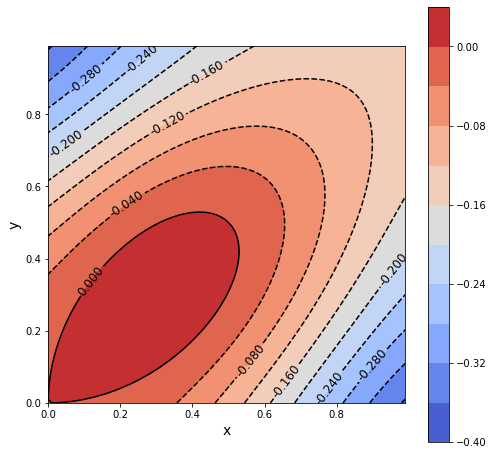

In [13]:
for i in range(len(SOLS1)):
    in_circle = (SOLS1[i][0])**2 + (SOLS1[i][1])**2
    if in_circle<=(1/4):
        fig = plt.figure(i,figsize=(8,8))
        xp = np.arange(int(SOLS1[i][0]-1),int(SOLS1[i][0]+1),0.01)
        yp = np.arange(int(SOLS1[i][1]-1),int(SOLS1[i][1]+1),0.01)
        X,Y = np.meshgrid(xp,yp)
        
        s = fig.add_subplot(111)
        A =plt.contour(X,Y,F(X,Y),levels =10,colors="k")
        C = s.contourf(X,Y,F(X,Y),levels=10,cmap = plt.cm.coolwarm)
        s.clabel(A,fontsize=12)
        s.set_aspect(1)
        s.set_xlabel('x',fontsize=14)
        s.set_ylabel('y',fontsize=14)
        fig.colorbar(C);
        #plt.contour(X,Y,F(X,Y),colors="k")

In [12]:
# The first plot shows that (0,0) is a saddle point as that is where the line corresponding to 0 appears to intersect itself
# The second plot shows that (-1/4 + sqrt(5)/4, -1/4 + sqrt(5)/4) is a maximum,as all the countours around it are decreasing.

#### Question 5

Using suitable plots of $f(x,y)$ you should be able to see that the symbolic solver hasn't returned all stationary points of $f(x,y)$.  

For any stationary point that has not been found already, locate the stationary point (correct to at least 2 decimal places for both $x$ and $y$ coordinates) and classify the nature of the stationary point. 

Store these locations in a list called `SOLS2` and types in `SOLS2_TYPES`.   <p style='text-align:right;'> <b> [4 Marks] </b> </p>

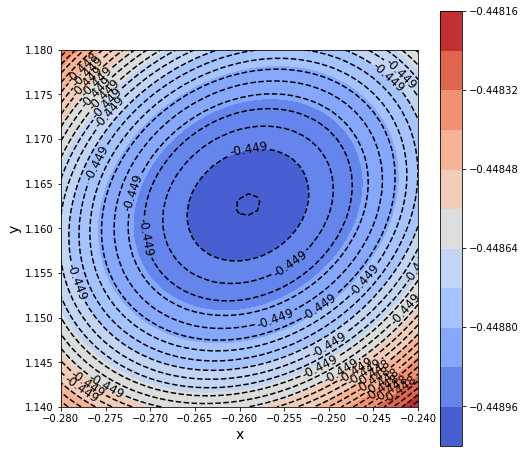

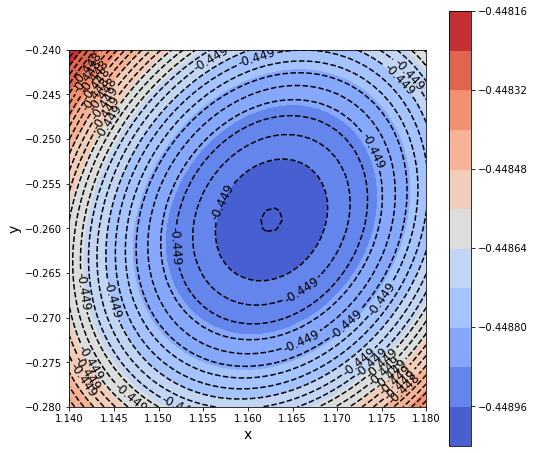

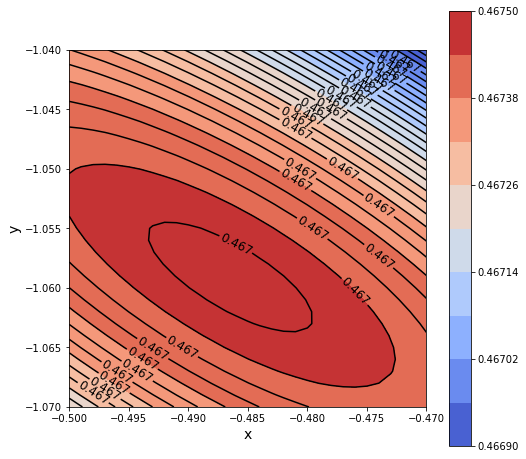

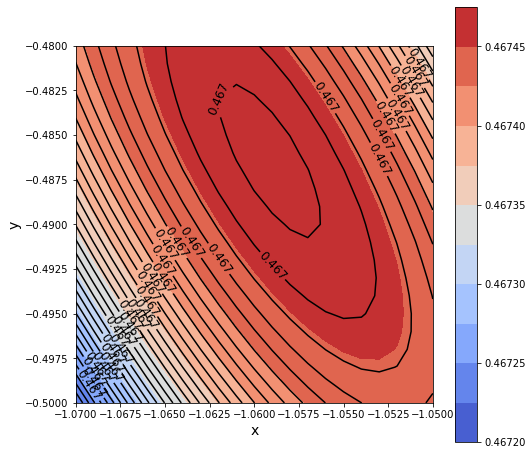

In [14]:
def plot_sp(x1,x2,y1,y2,pltfigure):
        xp = np.arange(x1,x2,0.001)
        yp = np.arange(y1,y2,0.001)
        X,Y = np.meshgrid(xp,yp)

        fig = plt.figure(pltfigure,figsize=(8,8))
        s = fig.add_subplot(111)
        A =plt.contour(X,Y,F(X,Y),levels =30,colors="k")
        C = s.contourf(X,Y,F(X,Y),levels=10,cmap = plt.cm.coolwarm)
        s.clabel(A,fontsize=12)
        s.set_aspect(1)
        s.set_xlabel('x',fontsize=14)
        s.set_ylabel('y',fontsize=14)
        fig.colorbar(C);
#Remaining point 1
plot_sp(-0.28,-0.24,1.14,1.18,4)
#so minimum at (-0.26,1.16)

#Remaining point 2
plot_sp(1.14,1.18,-0.28,-0.24,5)
#so a minimum at (1.16,-0.26)

#Remaining point 3
plot_sp(-0.5,-0.47,-1.07,-1.04,6)
#so a maximum at (-0.49,-1.06)

#Remaining point 4
plot_sp(-1.07,-1.05,-0.5,-0.48,7)
#so a maximum at (-1.06,-0.49)

In [15]:
SOLS2=[[-0.26,1.16],[1.16,-0.26],[-0.49,-1.06],[-1.06,-0.49]]
SOLS2_TYPES=[[-0.26,1.16,"minimum"],[1.16,-0.26,"minimum"],[-0.49,-1.06,"maximum"],[-1.06,-0.49,"maximum"]]

In [16]:
# VALIDATION CELL
import numbers
from nose.tools import assert_is_instance, assert_equal
if not 'SOLS2' in globals():
    raise NotImplementedError("SOLS2 has not been defined in Question 1.5")
assert_is_instance(SOLS2, list,
                   "SOLS2 should be a list, not a " + str(type(SOLS2)))

assert len(SOLS2) > 0, "SOLS2 is empty"
for sol in SOLS2:
    assert_is_instance(sol, (tuple, list), 
                       "each entry of SOLS2 should be a tuple or a list")
    assert_equal(len(sol), 2,
                 "each entry of SOLS2 should have length 2")
    for coord in sol:
        assert_is_instance(coord, numbers.Number)
    

In [17]:
# VALIDATION CELL
from nose.tools import assert_is_instance, assert_equal
if not 'SOLS2_TYPES' in globals():
    raise NotImplementedError("SOLS2_TYPES has not been defined in Question 1.5")
assert_is_instance(SOLS2_TYPES, list, 
                   "SOLS2_TYPES should be a list, not a " + str(type(SOLS2_TYPES)))

assert len(SOLS2_TYPES) > 0, "SOLS2_TYPES is empty"
for sol in SOLS2_TYPES:
    assert_is_instance(sol, (tuple, list), 
                       "each entry of SOLS2_TYPES should be a tuple or a list")
    assert_equal(len(sol), 3,
                 "each entry of SOLS2_TYPES should have length 3")
    
    assert_in(sol[2].lower(), ["maximum", "minimum", "saddle"],
             "the third entry of " + str(sol) + " should be one of 'maximum', 'minimum', or 'saddle'")


#### Question 6 

Generate one figure that clearly illustrates all your findings from the above.    <p style='text-align:right;'> <b> [2 Marks] </b> </p>

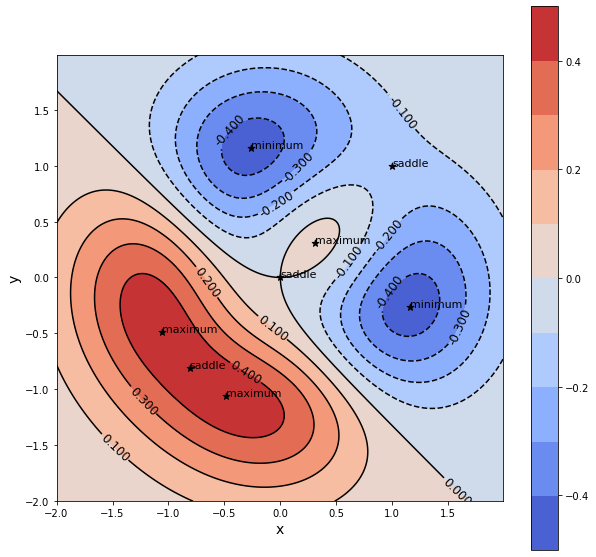

In [18]:
xp = np.arange(-2,2,0.01)
yp = np.arange(-2,2,0.01)
X,Y = np.meshgrid(xp,yp)


fig = plt.figure(8,figsize=(10,10))
s = fig.add_subplot(111)
A =plt.contour(X,Y,F(X,Y),levels =10,colors="k")
C = s.contourf(X,Y,F(X,Y),levels=10,cmap = plt.cm.coolwarm)
s.clabel(A,fontsize=12)
s.set_aspect(1)
s.set_xlabel('x',fontsize=14)
s.set_ylabel('y',fontsize=14)
fig.colorbar(C);
for i in range(len(SOLS1_TYPES)):
    s.text(SOLS1_TYPES[i][0],SOLS1_TYPES[i][1],SOLS1_TYPES[i][2],fontsize = 11)
    s.scatter(SOLS1_TYPES[i][0],SOLS1_TYPES[i][1],marker="*",color="black",s=50,zorder=2)
for i in range(len(SOLS2_TYPES)):
    s.text(SOLS2_TYPES[i][0],SOLS2_TYPES[i][1],SOLS2_TYPES[i][2],fontsize = 11)
    s.scatter(SOLS2_TYPES[i][0],SOLS2_TYPES[i][1],marker="*",color="black",s=50,zorder=2)

## Part 2: Using Python to find maxima and minima subject to a constraint.

The aim of Part 2 of this project is to use Python to identify extrema of our function subject to a constraint, and show the location of these extreme with respect to the function and the constraint. 

We continue to work with the function defined in Part 1 but now consider that function subject to the constraint 

$$g(x,y) = x^2+y^2-1=0$$ 

i.e. assume we are now restricted to lie on the circle of radius 1.

#### Question 1

By parameterising the constraint as 

$$(x(t),y(t)) = (\cos(t), \sin(t))$$ 

use *SymPy* to find a symbolic expression for $f(x(t),y(t)) = H(t)$, say. Call this `H`.

Use *SymPy* to plot $H(t)$ and $H'(t)$ and hence determine how many extrema of $f(x,y)$ lie on the constraint.  Store this number as `NExtrema`. [Remember to define $t$ as a symbol.]      <p style='text-align:right;'> <b> [3 Marks] </b> </p>

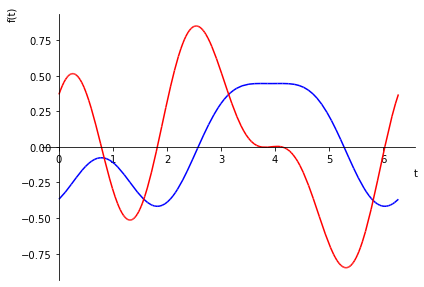

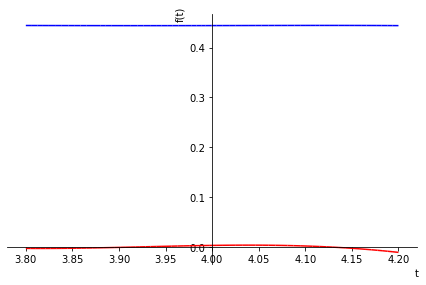

In [19]:
t = sym.symbols("t")
xt = sym.cos(t)
yt = sym.sin(t)
H = f.subs([(x,xt),(y,yt)])

a =sym.plot(H,sym.diff(H,t),(t,0,2*sym.pi),show=False)
a[0].line_color='blue'
a[1].line_color='red'
a.show()

# Shows clearly that H'(x) crosses the axis 3 times near t=4
c =sym.plot(H,sym.diff(H,t),(t,3.8,4.2),show=False)
c[0].line_color='blue'
c[1].line_color='red'
c.show()

NExtrema =6

In [20]:
# VALIDATION CELL
from nose.tools import assert_is_instance
for var in ['t', 'H']:
    if not var in globals():
        raise NotImplementedError(var + " has not been defined in Question 2.1")
assert_is_instance(t, sym.core.symbol.Symbol)
assert_is_instance(H, sym.core.Expr)



In [21]:
# VALIDATION CELL
if not 'NExtrema' in globals():
    raise NotImplementedError("NExtrema has not been defined in Question 2.1")
    

#### Question 2

We now use the method of Lagrange multiplers to find the $(x,y)$ coordinates of each of these extrema. 

To do so using exactly the method of our lecture notes would involve finding stationary points of the function 

$$K(x,y,l) = f(x,y) - l \cdot g(x,y).$$

While *SymPy* can find such stationary points this is very computationally expensive (and the workbook may grind to a halt!). 

Instead use what you know about the constraint to simplify the expression for $f(x,y)$ when on the constraint (still formulating an expression in terms of $x$ and $y$) and create a modified function $h(x,y)$, say, such that 

$$L(x,y,l) = h(x,y) - l \cdot g(x,y)$$ 

shares the same stationary points as $K(x,y,l)$ but $L(x,y,l)$ is just a polynomial. Call the polynomial `L`.  <p style='text-align:right;'> <b> [2 Marks] </b> </p>

In [22]:
#since x^2 +y^2 =1 can substitute this

h = (x*y-x**3-y**3)*sym.exp(-1)
g = (x**2+y**2-1)
l=sym.symbols("l")
L = h-l*g

In [23]:
# VALIDATION CELL
from nose.tools import assert_is_instance
for var in ['l', 'L']:
    if not var in globals():
        raise NotImplementedError(var + " has not been defined in Question 2.2")
assert_is_instance(l, sym.core.symbol.Symbol)
assert_is_instance(L, sym.core.Expr)


#### Question 3 

Use *SymPy* to find the three first partial derivatives of $L(x,y,l)$ (i.e. partial derivatives with respect to $x$, $y$ and $l$) and hence to determine stationary points of $L$. 

Store your stationary points in a list called `SOLS3`.  <p style='text-align:right;'> <b> [1 Mark] </b> </p>

In [24]:
l1 = sym.diff(L,x)
l2 = sym.diff(L,y)
l3 = x**2+y**2-1
eq=[l1,l2,l3]

SOLS3 = [[],[],[],[],[],[]]
SOLS3_INIT = list(sym.nonlinsolve(eq,[x,y,l]))
for i in range(len(SOLS3_INIT)):
    SOLS3[i].append(SOLS3_INIT[i][0])
    SOLS3[i].append(SOLS3_INIT[i][1])


In [25]:
# VALIDATION CELL
from nose.tools import assert_is_instance, assert_equal
if not 'SOLS3' in globals():
    raise NotImplementedError("SOLS3 has not been defined in Question 2.3")
assert_is_instance(SOLS3, list,
                   "SOLS3 should be a list, not a " + str(type(SOLS3)))

assert len(SOLS3) > 0, "SOLS3 is empty"
for sol in SOLS3:
    assert_is_instance(sol, (tuple, list), 
                       "each entry of SOLS3 should be a tuple or a list")
    assert_equal(len(sol), 2,
                 "each entry of SOLS3 should have length 2")
    

#### Question 4

Now create a contour plot of $f(x,y)$ and overlay a plot of the constraint. Add also markers indicating the locations of each of the extrema of $f(x,y)$ along the constraint.

By inspecting the resulting plot classify each of the extrema on the constraint as either a minimum or maximum point. 


Store your results in a list called `SOLS3_TYPES` where each entry has format `[x,y,'type']` (e.g. `[5,-7,'minimum']` if the location $(5,-7)$ was a minimum along the constraint).    <p style='text-align:right;'> <b> [2 Marks] </b> </p>


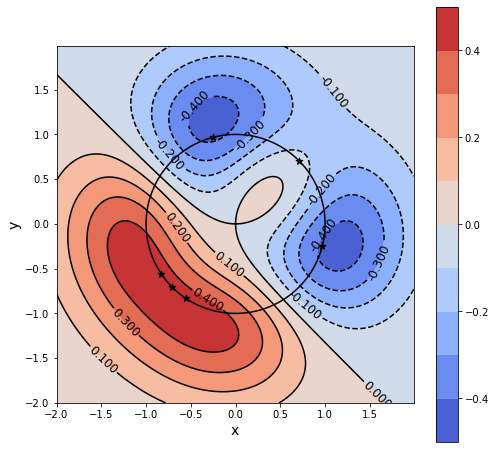

In [26]:
G = sym.lambdify((x,y),g,"numpy")

fig = plt.figure(9,figsize=(8,8))
s = fig.add_subplot(111)
A =plt.contour(X,Y,F(X,Y),levels =10,colors="k")
C = s.contourf(X,Y,F(X,Y),levels=10,cmap = plt.cm.coolwarm)


s.clabel(A,fontsize=12)
s.set_aspect(1)
s.set_xlabel('x',fontsize=14)
s.set_ylabel('y',fontsize=14)
fig.colorbar(C);

D =s.contour(X,Y,G(X,Y),levels=0,colors="black")

SOLS3_TYPES =[[0,0,""],[0,0,""],[0,0,""],[0,0,""],[0,0,""],[0,0,""]]
for i in range(len(SOLS3)):
    s.scatter(SOLS3[i][0],SOLS3[i][1],marker="*",color="black",s=50,zorder=2)
    SOLS3_TYPES[i][0]=SOLS3[i][0]
    SOLS3_TYPES[i][1]=SOLS3[i][1]

SOLS3_TYPES[0][2]="minimum"
SOLS3_TYPES[1][2]="maximum"
SOLS3_TYPES[2][2]="minimum"
SOLS3_TYPES[3][2]="maximum"
SOLS3_TYPES[4][2]="maximum"
SOLS3_TYPES[5][2]="minimum"

In [27]:
# VALIDATION CELL
from nose.tools import assert_in, assert_is_instance, assert_equal
if not 'SOLS3_TYPES' in globals():
    raise NotImplementedError("SOLS3_TYPES has not been defined in Question 2.4")
assert_is_instance(SOLS3_TYPES, list, 
                   "SOLS3_TYPES should be a list, not a " + str(type(SOLS3_TYPES)))

assert len(SOLS3_TYPES) > 0, "SOLS3_TYPES is empty"
for sol in SOLS3_TYPES:
    assert_is_instance(sol, (tuple, list), 
                       "each entry of SOLS3_TYPES should be a tuple or a list")
    assert_equal(len(sol), 3,
                 "each entry of SOLS3_TYPES should have length 3")
    
    assert_in(sol[2].lower(), ["maximum", "minimum"],
             "the third entry of " + str(sol) + " should be one of 'maximum' or 'minimum'")   
    